# HACKATHON: BRAZIL HOUSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("C:/Users/user/Downloads/Datasets/DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
df.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973


# Current Scenario
   **Requirement of relocation**

# Aim
**Reducing expenses and calculating tax**

# Objective
**Picking suitable cities for relocation for bachelors, mid-sized families and large families in terms of expenses.**

# Agenda

# Understanding the data

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.shape

(10692, 13)

In [5]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [6]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [7]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [8]:
for i in df.columns:
    print(df[i].unique())

['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
[   70   320    80    51    25   376    72   213   152    35    26    46
    36    55   100   330   110    88    56   600    42   160    90    49
    41    64   208    20    32    45   350    38    30    40   300   240
   200   360   250    48   150    60    31   210   280    93    75   194
    65   278    61   130   164   220   108   128    47   170    68    63
   145    85   254   296   133    44    22    50    67   109   400   284
   309    73   155    58    94    76   192   217    95   900    34    62
   180   140    52   999   270    71   500    96   660   107   105   287
    24   154   101   384    57    39    78    28    83   750   258   123
   127   219   420    59   225   480    53   121    43   570    89   173
    91   530    87   136   308   260   120    33   131   161   720   236
    81   125    37   230   450   234   135   395    92   412   190   165
   380    19   124   115   700    15   204   540  

In [9]:
df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [10]:
def whole():
    col = df.columns
    shape = df.shape
    dtyp = df.dtypes
    null = df.isnull().sum()
    info = df.info()
    desc = df.describe()
    for i in df:
        uniq = print(df[i].unique())
        
    for i in df:
        val_cnt = print(df[i].value_counts())
    
    return (col,shape,dtyp,null,info,desc,uniq,val_cnt)

In [11]:
whole()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB
['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
[   70   320    80    51    25 

(Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
        'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
        'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
       dtype='object'),
 (10692, 13),
 city                   object
 area                    int64
 rooms                   int64
 bathroom                int64
 parking spaces          int64
 floor                   int64
 animal                 object
 furniture              object
 hoa (R$)                int64
 rent amount (R$)        int64
 property tax (R$)       int64
 fire insurance (R$)     int64
 total (R$)              int64
 dtype: object,
 city                   0
 area                   0
 rooms                  0
 bathroom               0
 parking spaces         0
 floor                  0
 animal                 0
 furniture              0
 hoa (R$)               0
 rent amount (R$)       0
 property tax (R$)      0
 fire insurance (R$)    0
 total (R$)             0
 dt

# Segregating all categorical and continuous columns

In [12]:
categorical=df.select_dtypes(exclude='number')
categorical.columns

Index(['city', 'animal', 'furniture'], dtype='object')

In [13]:
continuous=df.select_dtypes(include='number')
continuous.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)',
       'total (R$)'],
      dtype='object')

# Data Cleaning

**Checking for outliers**

In [14]:
mydata=pd.DataFrame()
def findout(ind, k):
    myval=continuous.loc[:,k]
    mycount=len(myval)
    mymin=myval.min()
    mymax=myval.max()
    myrange=mymax-mymin
    
    myQ1=myval.quantile(0.25)
    myQ3=myval.quantile(0.75)
    myIQR=myQ3-myQ1
    myUF=myQ3+(1.5*myIQR)
    myLF=myQ1-(1.5*myIQR)
    
    mydata.insert(ind, column=k, value=[mycount,mymin,mymax,myrange,myQ1,myQ3,myIQR,myUF,myLF])

In [15]:
j={0:"area",1:"rooms",2:"bathroom",3:"parking spaces",4:"floor",5:"hoa (R$)",6:"rent amount (R$)",7:"property tax (R$)",8:"fire insurance (R$)",9:"total (R$)"}
for ind, col in j.items():
    findout(ind,col)

In [16]:
mydata.index=["mycount","mymin","mymax","myrange","myQ1","myQ3","myIQR","myUF","myLF"]
mydata

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
mycount,10692.0,10692.0,10692.0,10692.0,10692.0,10692.00,10692.0,10692.0,10692.0,10692.000
mymin,11.0,1.0,1.0,0.0,0.0,0.00,450.0,0.0,3.0,499.000
mymax,46335.0,13.0,10.0,12.0,301.0,1117000.00,45000.0,313700.0,677.0,1120000.000
myrange,46324.0,12.0,9.0,12.0,301.0,1117000.00,44550.0,313700.0,674.0,1119501.000
myQ1,56.0,2.0,1.0,0.0,1.0,170.00,1530.0,38.0,21.0,2061.750
myQ3,182.0,3.0,3.0,2.0,8.0,1237.50,5000.0,375.0,68.0,6768.000
myIQR,126.0,1.0,2.0,2.0,7.0,1067.50,3470.0,337.0,47.0,4706.250
myUF,371.0,4.5,6.0,5.0,18.5,2838.75,10205.0,880.5,138.5,13827.375
myLF,-133.0,0.5,-2.0,-3.0,-9.5,-1431.25,-3675.0,-467.5,-49.5,-4997.625


**Replacing outliers with the average value of respective column**

In [17]:
median1 = round(df.area.median())
indices1=np.where(df["area"]>371)
for i in indices1:
    df.loc[i,"area"]=median1
print("*"*111)

***************************************************************************************************************


In [18]:
mean1 = round(df.rooms.mean())
indices2=np.where(df["rooms"]>5)
for i in indices2:
    df.loc[i,"rooms"]=mean1
print("*"*111)

***************************************************************************************************************


In [19]:
mean3 = round(df.bathroom.mean())
indices3=np.where(df["bathroom"]>4)
for i in indices3:
    df.loc[i,"bathroom"]=mean3
print("*"*111)

***************************************************************************************************************


In [20]:
mean4 = round(df["parking spaces"].mean())
indices4=np.where(df["parking spaces"]>3)
for i in indices4:
    df.loc[i,"parking spaces"]=mean4
print("*"*111)

***************************************************************************************************************


In [21]:
mean5 = round(df.floor.mean())
indices5=np.where(df["floor"]>18)
for i in indices5:
    df.loc[i,"floor"]=mean5
print("*"*111)

***************************************************************************************************************


In [22]:
mean6 = round(df["hoa (R$)"].mean())
indices6=np.where(df["hoa (R$)"]>2838)
for i in indices6:
    df.loc[i,"hoa (R$)"]=mean6
print("*"*111)

***************************************************************************************************************


In [23]:
mean7 = round(df["rent amount (R$)"].mean())
indices7=np.where(df["rent amount (R$)"]>10205)
for i in indices7:
    df.loc[i,"rent amount (R$)"]=mean7
print("*"*111)

***************************************************************************************************************


In [24]:
mean8 = round(df["property tax (R$)"].mean())
indices8=np.where(df["property tax (R$)"]>880)
for i in indices8:
    df.loc[i,"property tax (R$)"]=mean8
print("*"*111)

***************************************************************************************************************


In [25]:
mean9 = round(df["fire insurance (R$)"].mean())
indices9=np.where(df["fire insurance (R$)"]>138)
for i in indices9:
    df.loc[i,"fire insurance (R$)"]=mean9
print("*"*111)

***************************************************************************************************************


In [26]:
mean10 = round(df["total (R$)"].mean())
indices10=np.where(df["total (R$)"]>13827)
for i in indices10:
    df.loc[i,"total (R$)"]=mean10
print("*"*111)

***************************************************************************************************************


# Univariate analysis

**Target column: City**

**CATEGORICAL**

In [27]:
categorical.columns

Index(['city', 'animal', 'furniture'], dtype='object')

In [28]:
city_count=df["city"].value_counts()
city_txt=df["city"].value_counts().index

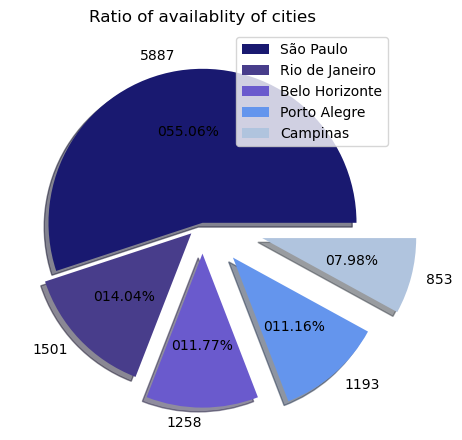

In [29]:
fig,ax=plt.subplots(figsize=(5,5))
plt.pie(city_count, autopct="0%.2f%%",labels=city_count, explode=[0,0.1,0.2,0.3,0.4],colors=["midnightblue","darkslateblue","slateblue","cornflowerblue","lightsteelblue"], shadow=True)
plt.title("Ratio of availablity of cities")
plt.legend(city_txt,loc="upper right")
plt.savefig("Brazil_pie_1.jpg");

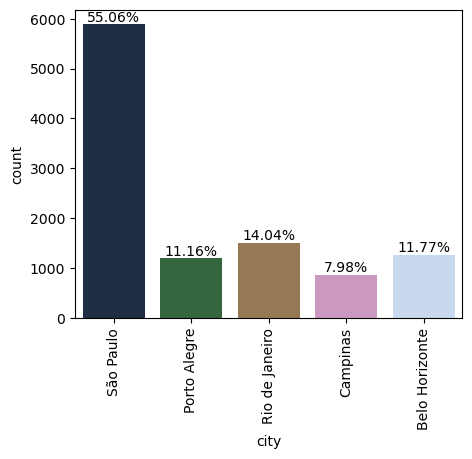

In [30]:
fig,ax=plt.subplots(figsize=(5,4))
sns.countplot(x=df["city"],palette="cubehelix")
plt.xticks(rotation=90)

for bar in ax.patches:
    percentage=f"{round((bar.get_height()/len(df))*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
    plt.savefig("Brazil_count_1.jpg");

**Interpretation: Sao Paulo has the maximum area available for relocation**

In [31]:
k=["animal","furniture"]

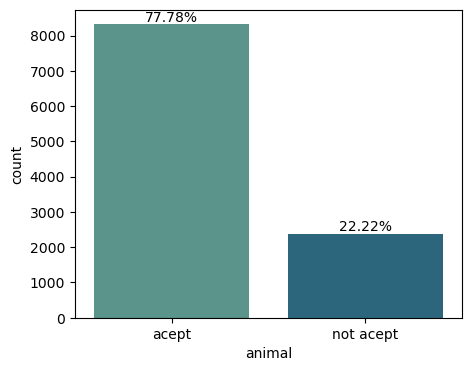

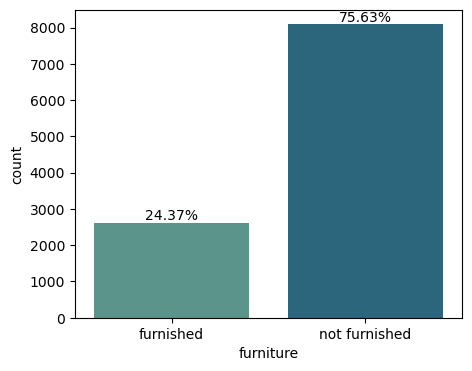

In [32]:
for i in df[k]:
    fig,ax=plt.subplots(figsize=(5,4))
    sns.countplot(x=df[i],palette="crest")
    for bar in ax.patches:
        percentage=f"{round((bar.get_height()/len(df))*100,2)}%"
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.savefig("Brazil_categorical_univar.jpg")
plt.show()

**Interpretation: More than 75% of the places available to relocate, do not provide furnished apartments but allow keeping of animals.** 


**CONTINUOUS**

In [33]:
continuous.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)',
       'total (R$)'],
      dtype='object')

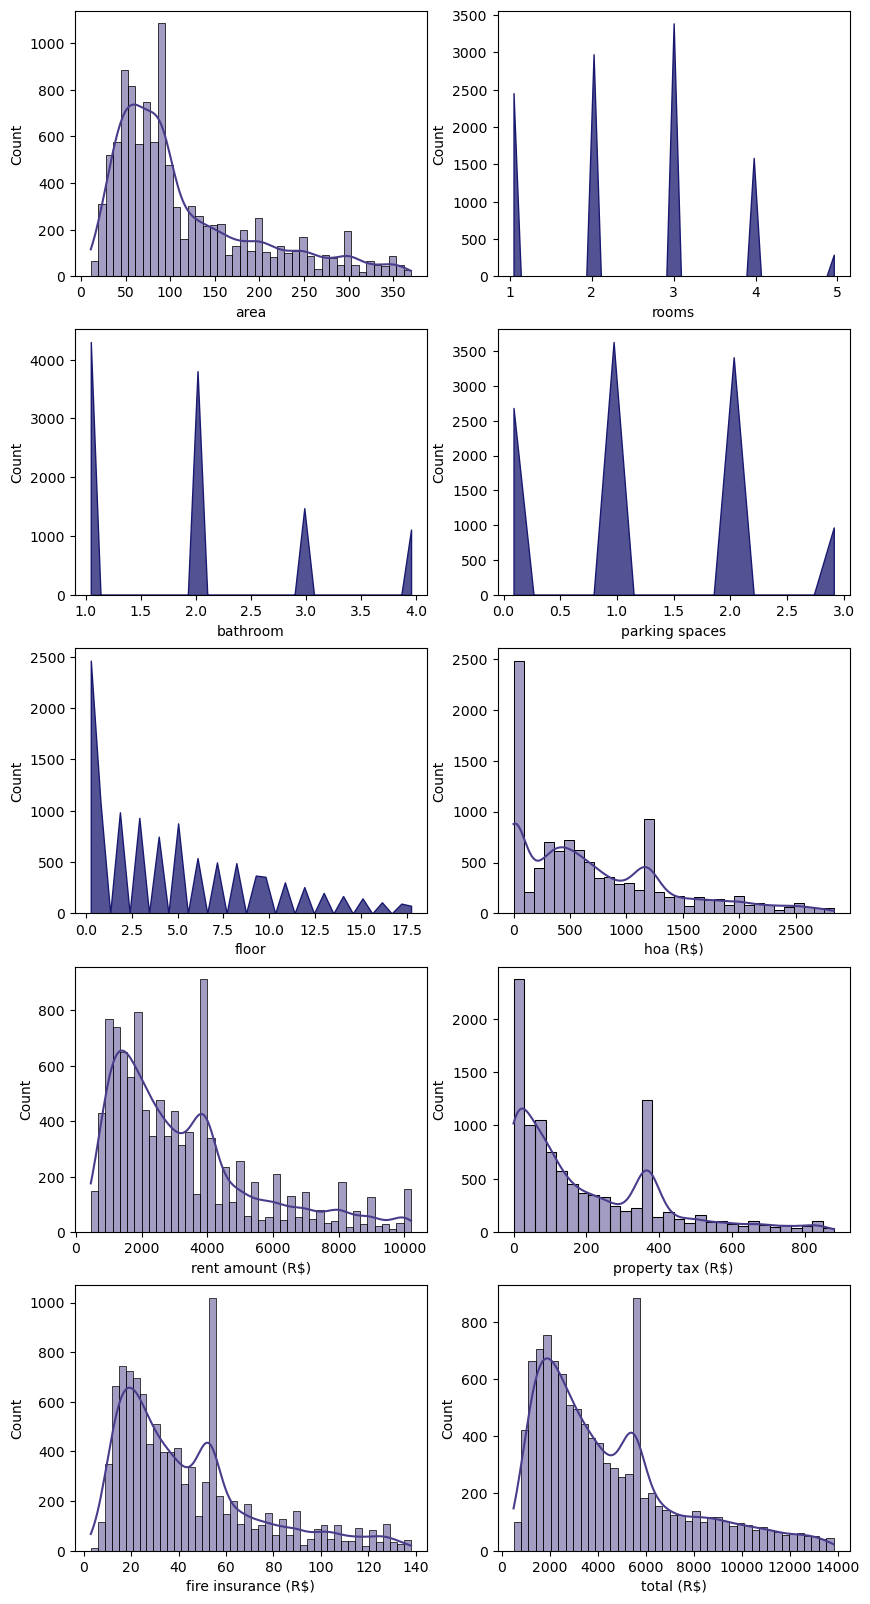

In [34]:
fig,ax=plt.subplots(5,2,figsize=(10,20))
sns.histplot(df, x=df["rooms"],ax=ax[0,1],element="poly",color="midnightblue")
sns.histplot(df, x=df["bathroom"],ax=ax[1,0],element="poly",color="midnightblue")
sns.histplot(df, x=df["parking spaces"],ax=ax[1,1],element="poly",color="midnightblue")
sns.histplot(df, x=df["floor"],ax=ax[2,0],element="poly",color="midnightblue")
sns.histplot(df, x=df["area"],ax=ax[0,0],kde=True,color="darkslateblue")
sns.histplot(df, x=df["hoa (R$)"],ax=ax[2,1],kde=True,color="darkslateblue")
sns.histplot(df, x=df["rent amount (R$)"],ax=ax[3,0],kde=True,color="darkslateblue")
sns.histplot(df, x=df["property tax (R$)"],ax=ax[3,1],kde=True,color="darkslateblue")
sns.histplot(df, x=df["fire insurance (R$)"],ax=ax[4,0],kde=True,color="darkslateblue")
sns.histplot(df, x=df["total (R$)"],ax=ax[4,1],kde=True,color="darkslateblue")
plt.savefig("Brazil_continuous_univar.jpg"); 

# Bivariate Analysis

In [35]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

**Analyzing wrt Target column**

In [36]:
categorical.columns

Index(['city', 'animal', 'furniture'], dtype='object')

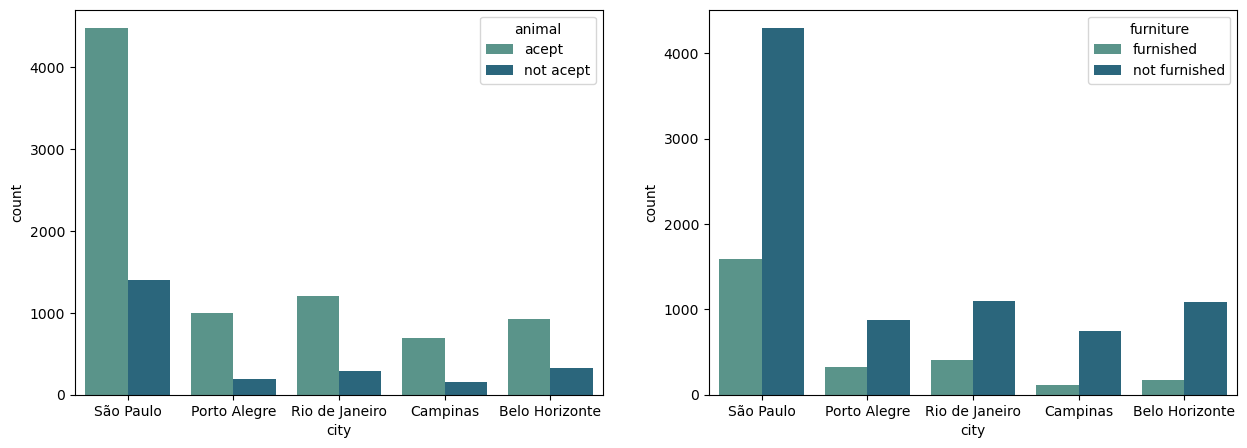

In [37]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.countplot(x=df["city"],hue=df["animal"],ax=ax[0],palette="crest")
sns.countplot(x=df["city"], hue=df["furniture"],ax=ax[1],palette="crest")
plt.savefig("Brazil_categorical_bivar.jpg")
plt.show()

**Interpretation: All five cities available for relocation have more options for keeping pets and less options of having a furnished apartment.**

In [38]:
continuous.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)',
       'total (R$)'],
      dtype='object')

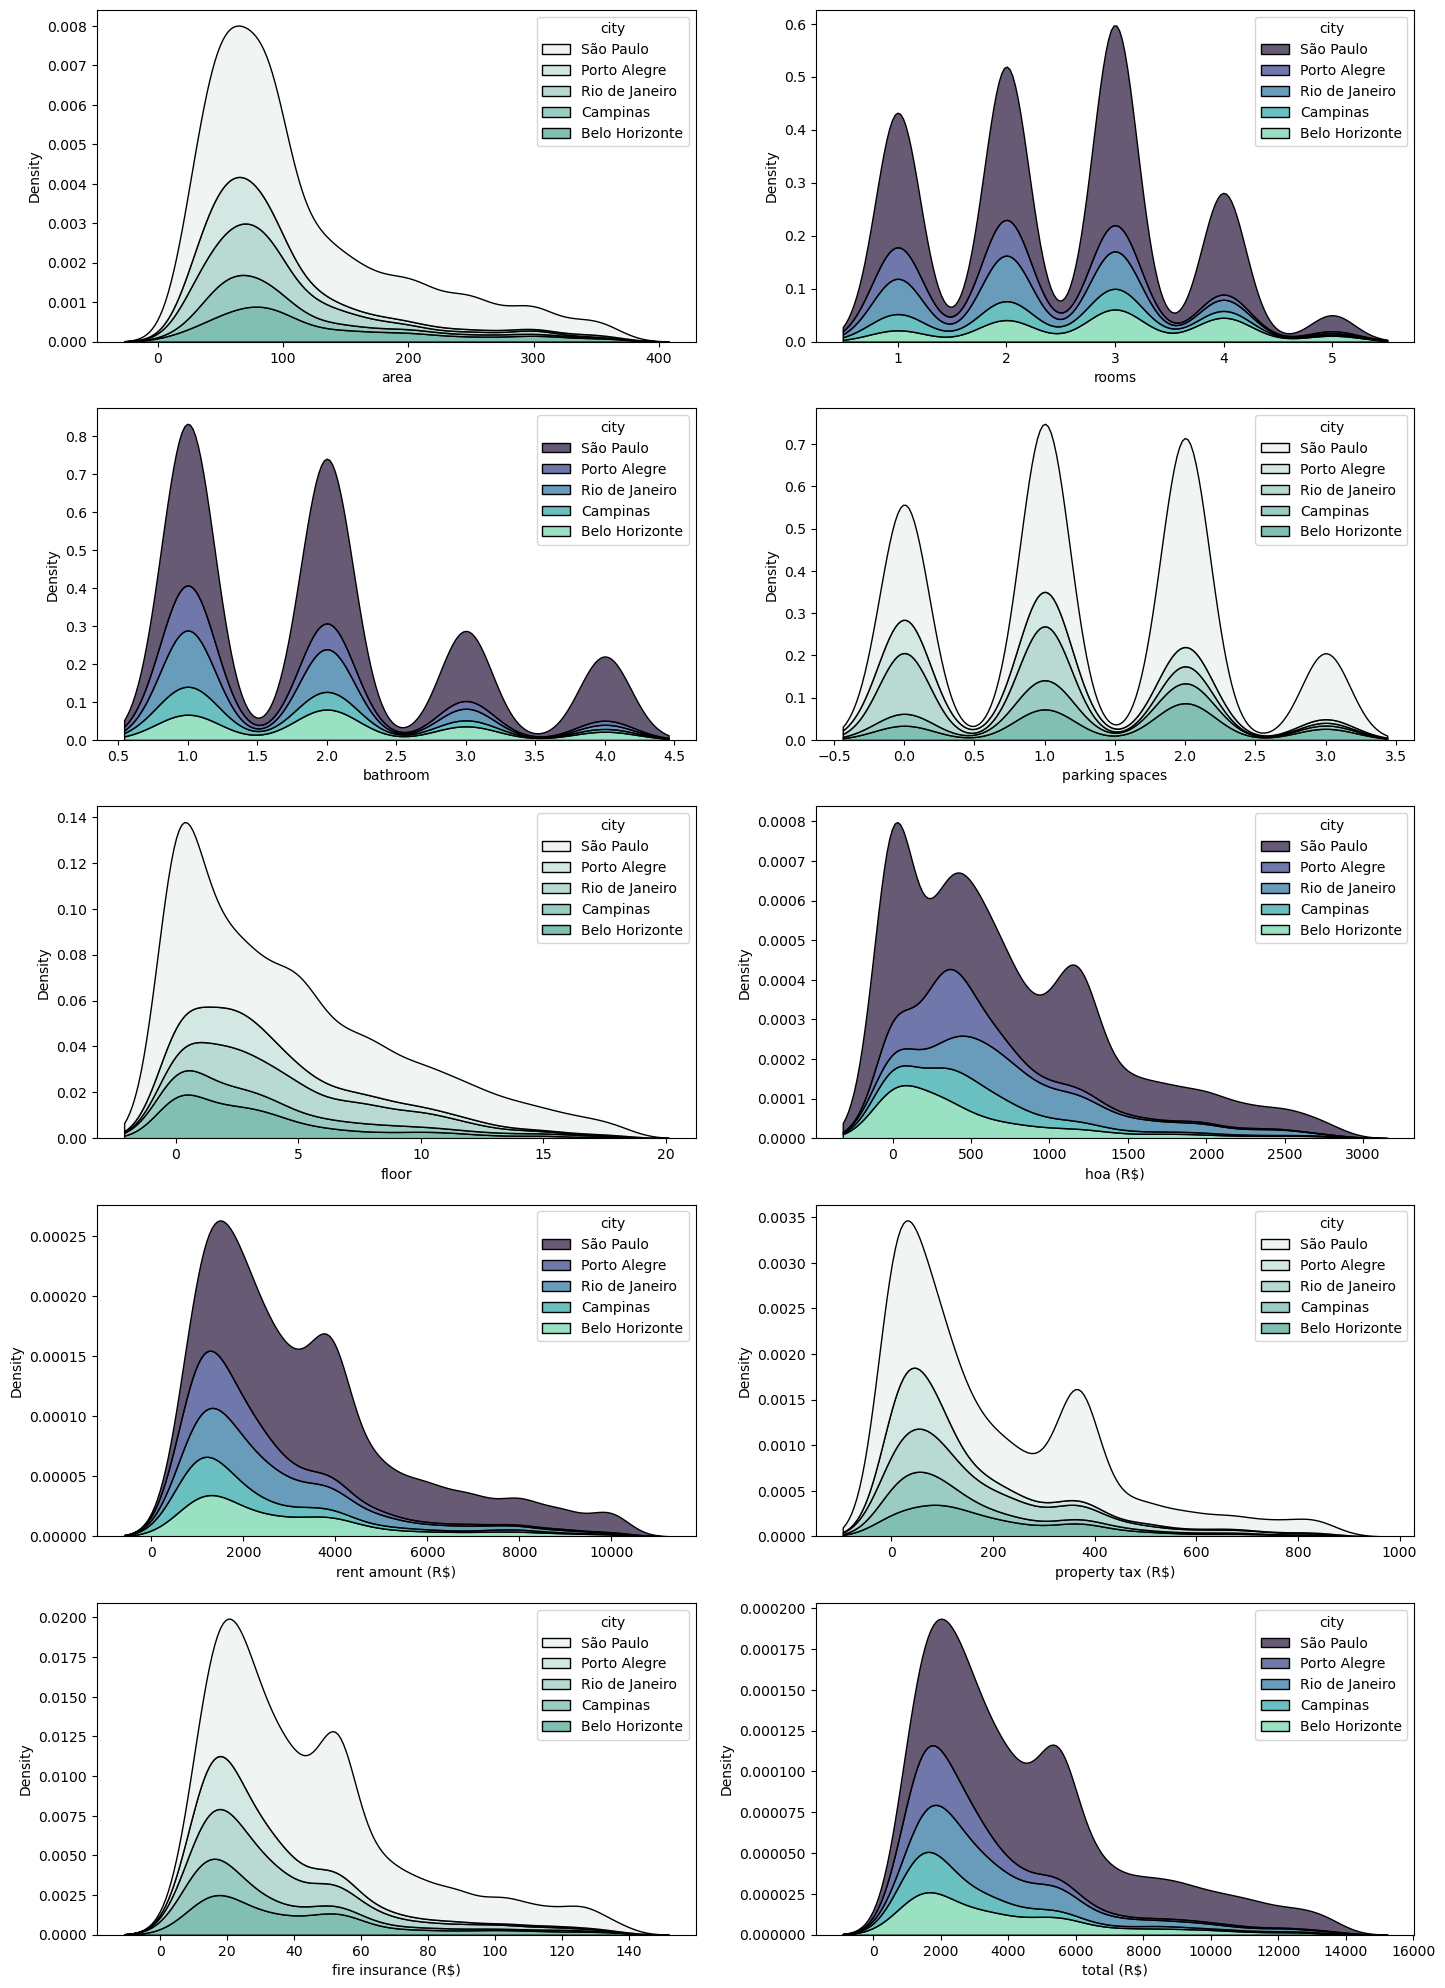

In [39]:
fig,ax=plt.subplots(5,2,figsize=(17,25))
sns.kdeplot(x=df["area"], hue=df["city"],ax=ax[0,0],multiple="stack",palette="light:#5A9")
sns.kdeplot(x=df["rooms"], hue=df["city"],ax=ax[0,1],multiple="stack",palette="mako")
sns.kdeplot(x=df["bathroom"], hue=df["city"],ax=ax[1,0],multiple="stack",palette="mako")
sns.kdeplot(x=df["parking spaces"], hue=df["city"],ax=ax[1,1],multiple="stack",palette="light:#5A9")
sns.kdeplot(x=df["floor"], hue=df["city"],ax=ax[2,0],multiple="stack",palette="light:#5A9")
sns.kdeplot(x=df["hoa (R$)"], hue=df["city"],ax=ax[2,1],multiple="stack",palette="mako")
sns.kdeplot(x=df["rent amount (R$)"], hue=df["city"],ax=ax[3,0],multiple="stack",palette="mako")
sns.kdeplot(x=df["property tax (R$)"], hue=df["city"],ax=ax[3,1],multiple="stack",palette="light:#5A9")
sns.kdeplot(x=df["fire insurance (R$)"], hue=df["city"],ax=ax[4,0],multiple="stack",palette="light:#5A9")
sns.kdeplot(x=df["total (R$)"], hue=df["city"],ax=ax[4,1],multiple="stack",palette="mako")
plt.savefig("Brazil_continuous_bivar.jpg");

**Interpretation: Belo Horizonte and Campinas have the cheapest apartments to relocate in terms of all the cost 
factors such as property tax, fire insurance, rent etc.**

**Analyzing wrt correlated columns**

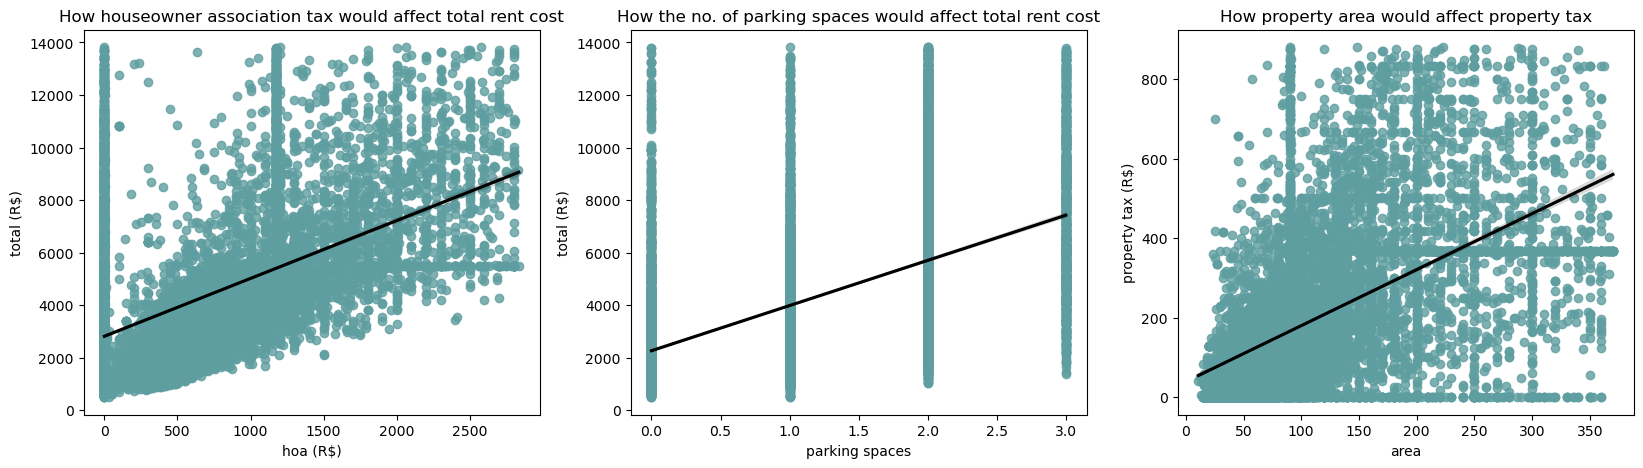

In [40]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
sns.regplot(x=df["hoa (R$)"], y=df["total (R$)"], scatter_kws={"color":"cadetblue"}, line_kws={"color":"black"},ax=ax[0]).set(title="How houseowner association tax would affect total rent cost")
sns.regplot(x=df["parking spaces"], y=df["total (R$)"], scatter_kws={"color":"cadetblue"}, line_kws={"color":"black"},ax=ax[1]).set(title="How the no. of parking spaces would affect total rent cost")
sns.regplot(x=df["area"], y=df["property tax (R$)"], scatter_kws={"color":"cadetblue"}, line_kws={"color":"black"},ax=ax[2]).set(title="How property area would affect property tax")
plt.savefig("Brazil_continuous_bivar_corr.jpg");

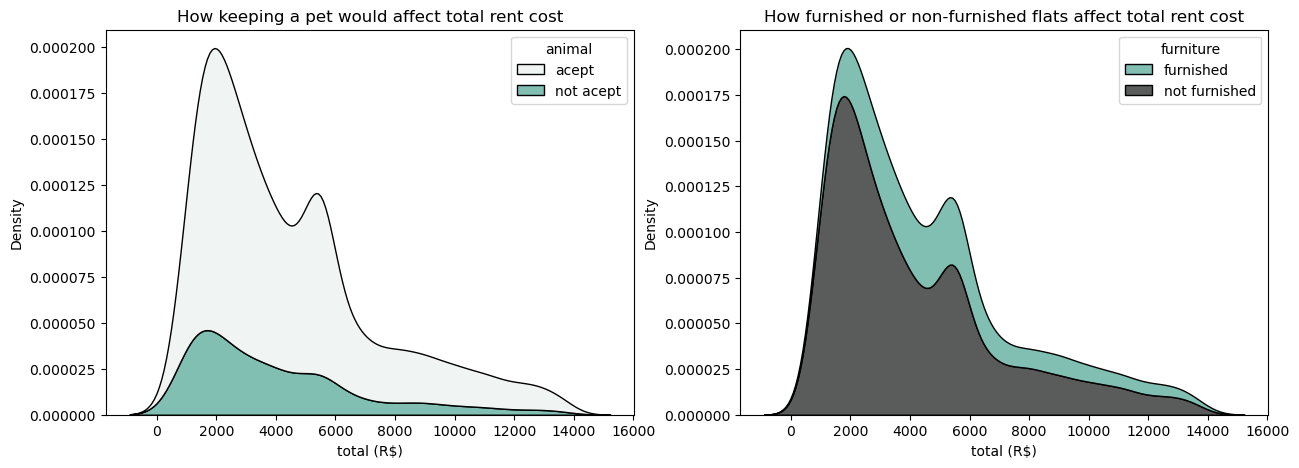

In [41]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=df["total (R$)"], hue=df["animal"],multiple="stack",palette="light:#5A9",ax=ax[0]).set(title="How keeping a pet would affect total rent cost")
sns.kdeplot(x=df["total (R$)"], hue=df["furniture"],multiple="stack",palette="dark:#5A9_r",ax=ax[1]).set(title="How furnished or non-furnished flats affect total rent cost")
plt.savefig("Brazil_categorical_bivar_corr.jpg");

**Interpretation: The above visual concludes that the apartments which are allowing pets and those which are furnished are having a higher rent amount as compared to non-furnished and those who are not allowing pets.** 


In [42]:
df.groupby('city')['animal'].value_counts().sort_values(ascending = True)

city            animal   
Campinas        not acept     160
Porto Alegre    not acept     188
Rio de Janeiro  not acept     296
Belo Horizonte  not acept     327
Campinas        acept         693
Belo Horizonte  acept         931
Porto Alegre    acept        1005
Rio de Janeiro  acept        1205
São Paulo       not acept    1405
                acept        4482
Name: count, dtype: int64

In [43]:
df.groupby('city')['furniture'].value_counts().sort_values(ascending = True)

city            furniture    
Campinas        furnished         111
Belo Horizonte  furnished         177
Porto Alegre    furnished         319
Rio de Janeiro  furnished         406
Campinas        not furnished     742
Porto Alegre    not furnished     874
Belo Horizonte  not furnished    1081
Rio de Janeiro  not furnished    1095
São Paulo       furnished        1593
                not furnished    4294
Name: count, dtype: int64

In [44]:
df.groupby('city')['total (R$)'].mean().sort_values(ascending = False)

city
São Paulo         5130.181247
Rio de Janeiro    4089.839440
Belo Horizonte    3905.743243
Campinas          3032.092614
Porto Alegre      2829.673931
Name: total (R$), dtype: float64

**São Paulo , Rio de janeiro e Belo Horizonte have the highest rent values.**

In [45]:
df.groupby('city')['hoa (R$)'].mean().sort_values(ascending = False)

city
Rio de Janeiro    921.407062
São Paulo         799.035672
Campinas          584.729191
Belo Horizonte    508.099364
Porto Alegre      444.706622
Name: hoa (R$), dtype: float64

**Cities with a higher homeowner association tax have a higher rent value.**

In [46]:
df.groupby('furniture')['rent amount (R$)'].mean().sort_values(ascending = False)

furniture
furnished        3960.068304
not furnished    3042.783453
Name: rent amount (R$), dtype: float64

**Furnished houses have a higher rent value.**

# Multivariate Analysis

In [47]:
continuous.corr()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,-0.012724,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,-0.078687,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.004894,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,-0.020767,0.009321,0.578361,0.098378,0.597348,0.148684
floor,-0.012724,-0.078687,0.004894,-0.020767,1.000000,0.019872,0.073596,0.012626,0.013652,0.036431
hoa (R$),0.006890,0.007139,0.050271,0.009321,0.019872,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),0.180742,0.541758,0.668504,0.578361,0.073596,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.012626,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.013652,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.036431,0.955024,0.264490,0.218344,0.254911,1.000000


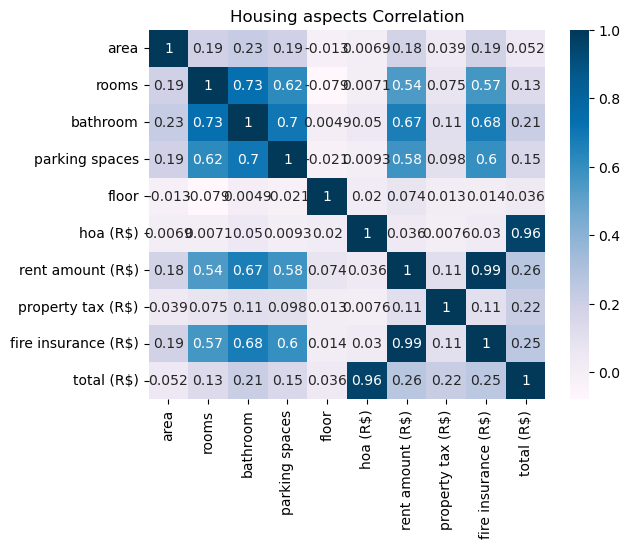

In [48]:
sns.heatmap(continuous.corr(),annot=True,cmap='PuBu')
plt.title("Housing aspects Correlation")
plt.savefig("Brazil_multivar_main_heatmap.jpg");

In [49]:
corr_col=df.loc[:,['hoa (R$)',
       'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)',
       'total (R$)']]

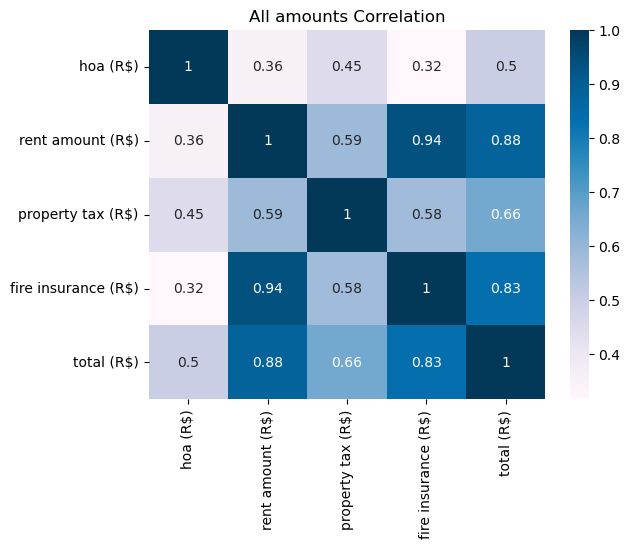

In [50]:
sns.heatmap(corr_col.corr(),annot=True,cmap='PuBu')
plt.title("All amounts Correlation")
plt.savefig("Brazil_multivar_amounts_heatmap.jpg");

**Interpretation: This visual concludes how each aspect is correlated to other aspects. The total payable amount is mainly getting influenced by the condominium cost. As the HOA increases, the total payable amount also increases.**


# Suitable cities for relocation of bachelors (1 member)

**Furnished and animals allowed**

In [51]:
Bachelor_petfren_furn=df[(df["rooms"]<=2) & (df["bathroom"]==1) & (df["parking spaces"]<=1) & (df["animal"]=="acept") & (df["furniture"]=="furnished")]
Bachelor_petfren_furn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
10,São Paulo,26,1,1,0,2,acept,furnished,470,2100,150,27,2747
13,São Paulo,55,1,1,1,2,acept,furnished,790,4200,224,54,5268
29,São Paulo,20,1,1,0,5,acept,furnished,602,1800,130,23,2555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10596,Rio de Janeiro,60,2,1,0,2,acept,furnished,175,1840,0,24,2039
10598,Porto Alegre,60,1,1,0,6,acept,furnished,300,1390,34,21,1745
10602,Rio de Janeiro,55,1,1,0,9,acept,furnished,600,2600,50,34,3284
10654,Rio de Janeiro,40,1,1,0,2,acept,furnished,742,2090,86,27,2945


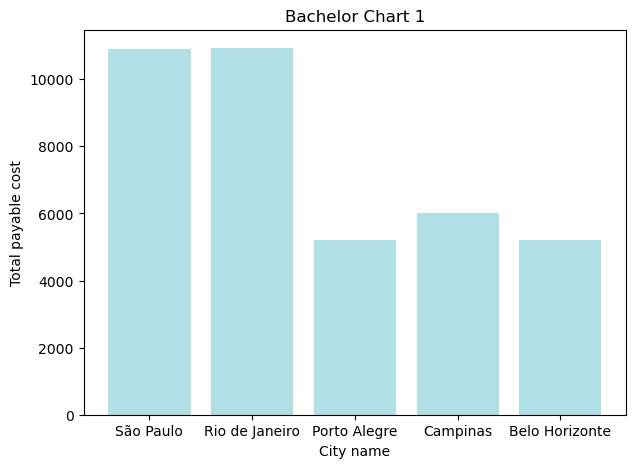

In [52]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(Bachelor_petfren_furn["city"], Bachelor_petfren_furn["total (R$)"],color="powderblue")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Bachelor Chart 1")
plt.savefig("Brazil_bachelor1.jpg");

In [53]:
Bachelor_petfren_furn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Belo Horizonte    1829.588235
Porto Alegre      1880.086022
Campinas          2577.093750
Rio de Janeiro    3069.469565
São Paulo         3585.699681
Name: total (R$), dtype: float64

**Non-furnished but animals allowed**

In [54]:
Bachelor_petfren_nofurn=df[(df["rooms"]<=2) & (df["bathroom"]==1) & (df["parking spaces"]<=1) & (df["animal"]=="acept") & (df["furniture"]=="not furnished")]
Bachelor_petfren_nofurn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
12,São Paulo,36,1,1,0,11,acept,not furnished,359,2100,70,27,2556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,São Paulo,24,1,1,0,0,acept,not furnished,0,870,0,14,884
10672,São Paulo,126,2,1,0,13,acept,not furnished,570,2580,0,33,3183
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10684,Rio de Janeiro,98,2,1,0,1,acept,not furnished,560,3900,184,51,4695


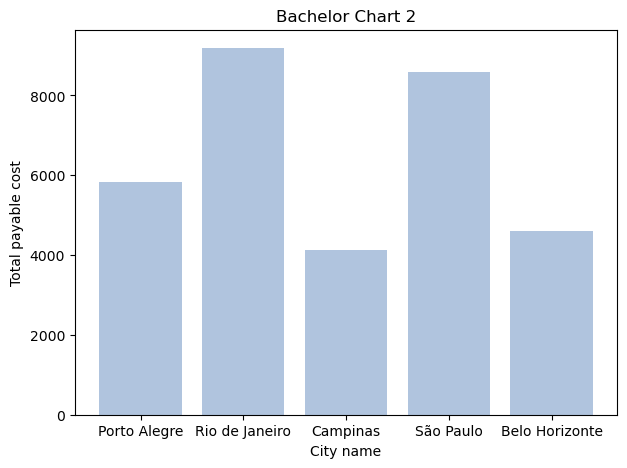

In [55]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(Bachelor_petfren_nofurn["city"], Bachelor_petfren_nofurn["total (R$)"],color="lightsteelblue")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Bachelor Chart 2")
plt.savefig("Brazil_bachelor2.jpg");

In [56]:
(Bachelor_petfren_nofurn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)).mean()

1806.834593287817

**Furnished but animals not allowed**

In [57]:
Bachelor_nopet_furn=df[(df["rooms"]<=2) & (df["bathroom"]==1) & (df["parking spaces"]<=1) & (df["animal"]=="not acept") & (df["furniture"]=="furnished")]
Bachelor_nopet_furn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
26,São Paulo,41,1,1,1,5,not acept,furnished,600,3000,0,39,3639
76,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0,33,2633
115,São Paulo,38,1,1,1,14,not acept,furnished,1620,2800,279,36,4735
120,São Paulo,48,1,1,0,9,not acept,furnished,377,3450,0,44,3871
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,Rio de Janeiro,33,1,1,0,6,not acept,furnished,500,2500,0,33,3033
10623,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0,33,2633
10632,Porto Alegre,18,1,1,0,3,not acept,furnished,370,1090,0,16,1476
10665,Belo Horizonte,55,2,1,1,2,not acept,furnished,200,1600,75,22,1897


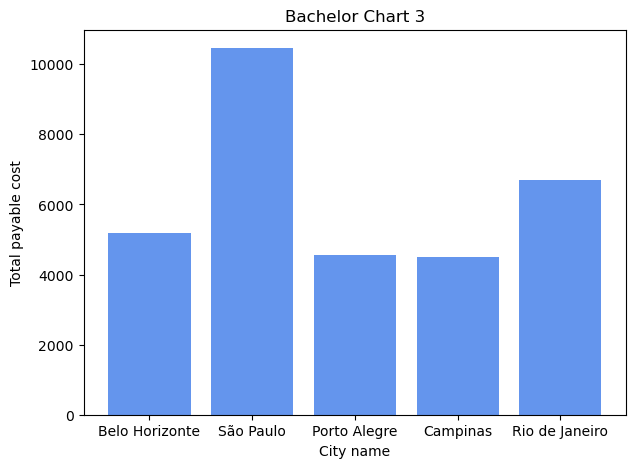

In [58]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(Bachelor_nopet_furn["city"], Bachelor_nopet_furn["total (R$)"],color="cornflowerblue")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Bachelor Chart 3")
plt.savefig("Brazil_bachelor3.jpg");

In [59]:
Bachelor_nopet_furn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Belo Horizonte    2025.388889
Campinas          2241.565217
Porto Alegre      2386.754098
Rio de Janeiro    3448.156250
São Paulo         4210.521930
Name: total (R$), dtype: float64

**Non-furnished and no animals allowed**

In [60]:
Bachelor_nopet_nofurn=df[(df["rooms"]<=2) & (df["bathroom"]==1) & (df["parking spaces"]<=1) & (df["animal"]=="not acept") & (df["furniture"]=="not furnished")]
Bachelor_nopet_nofurn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
38,São Paulo,70,2,1,0,0,not acept,not furnished,0,1150,59,18,1227
74,Rio de Janeiro,60,1,1,0,10,not acept,not furnished,450,1800,48,24,2322
78,São Paulo,45,1,1,0,1,not acept,not furnished,300,1240,0,16,1556
112,São Paulo,30,1,1,1,10,not acept,not furnished,886,1500,0,20,2406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10640,São Paulo,27,1,1,0,5,not acept,not furnished,1405,3500,1,45,4951
10643,São Paulo,90,2,1,0,0,not acept,not furnished,0,1450,50,22,1522
10648,Belo Horizonte,80,2,1,1,3,not acept,not furnished,240,1200,67,16,1523
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447


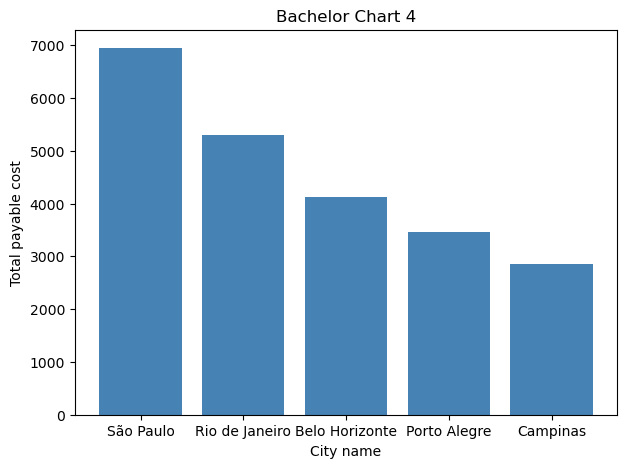

In [61]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(Bachelor_nopet_nofurn["city"], Bachelor_nopet_nofurn["total (R$)"],color="steelblue")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Bachelor Chart 4")
plt.savefig("Brazil_bachelor4.jpg");

In [62]:
Bachelor_nopet_nofurn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Belo Horizonte    1401.315789
Porto Alegre      1444.298246
Campinas          1444.830986
São Paulo         1950.227586
Rio de Janeiro    1996.235955
Name: total (R$), dtype: float64

# Suitable cities for relocation of mid-sized family 
# (3-4 members i.e parents with 1 or 2 kids)

**Furnished and animals allowed**

In [63]:
midsizfam_petfren_furn=df[(df["rooms"]==3) & (df["bathroom"]==2) & (df["parking spaces"]<=2) & (df["animal"]=="acept") & (df["furniture"]=="furnished")]
midsizfam_petfren_furn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
22,São Paulo,160,3,2,2,18,acept,furnished,1530,1900,167,25,3622
158,Rio de Janeiro,107,3,2,0,7,acept,furnished,1460,3200,270,42,4972
196,Campinas,85,3,2,2,16,acept,furnished,550,3300,150,42,4042
210,São Paulo,127,3,2,2,0,acept,furnished,220,2150,67,33,2470
318,São Paulo,234,3,2,2,0,acept,furnished,0,3680,400,56,4136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10529,São Paulo,210,3,2,0,11,acept,furnished,2200,4000,442,51,6693
10635,Porto Alegre,100,3,2,2,2,acept,furnished,900,2455,125,36,3516
10639,Rio de Janeiro,95,3,2,1,6,acept,furnished,1162,2600,443,34,4239
10650,São Paulo,190,3,2,1,6,acept,furnished,1174,8000,556,102,11700


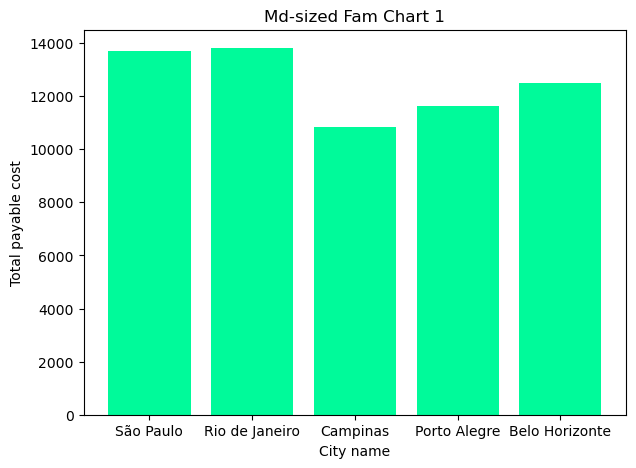

In [64]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(midsizfam_petfren_furn["city"], midsizfam_petfren_furn["total (R$)"],color="mediumspringgreen")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Md-sized Fam Chart 1")
plt.savefig("Brazil_MidSizeFam1.jpg");

In [65]:
midsizfam_petfren_furn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Campinas          3890.388889
Porto Alegre      4584.119048
Belo Horizonte    5357.785714
São Paulo         6529.408000
Rio de Janeiro    6994.386364
Name: total (R$), dtype: float64

**Non-furnished but animals allowed**

In [66]:
midsizfam_petfren_nofurn=df[(df["rooms"]==3) & (df["bathroom"]==2) & (df["parking spaces"]<=2) & (df["animal"]=="acept") & (df["furniture"]=="not furnished")]
midsizfam_petfren_nofurn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
24,Rio de Janeiro,90,3,2,1,7,acept,not furnished,800,1800,118,24,2742
28,Campinas,208,3,2,2,0,acept,not furnished,0,3180,100,48,3328
37,Belo Horizonte,80,3,2,1,0,acept,not furnished,0,3896,425,53,11610
58,Porto Alegre,75,3,2,1,9,acept,not furnished,340,1800,109,27,2276
67,Rio de Janeiro,130,3,2,1,7,acept,not furnished,1660,1700,475,22,3857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,Belo Horizonte,95,3,2,2,7,acept,not furnished,525,3100,219,42,3886
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10675,Rio de Janeiro,250,3,2,1,11,acept,not furnished,2000,2700,500,35,5235
10678,São Paulo,141,3,2,0,4,acept,not furnished,909,10140,772,129,11950


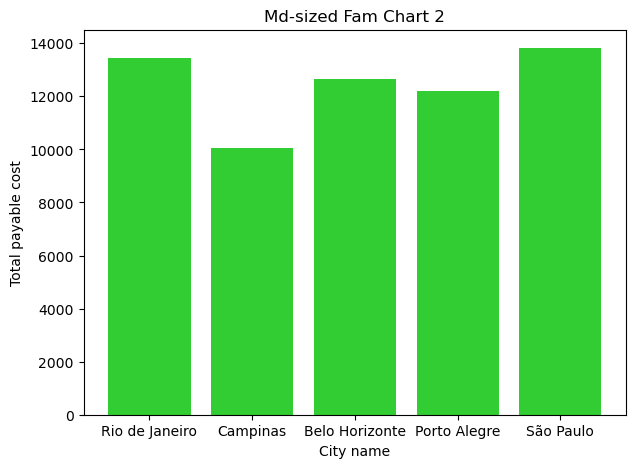

In [67]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(midsizfam_petfren_nofurn["city"], midsizfam_petfren_nofurn["total (R$)"],color="limegreen")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Md-sized Fam Chart 2")
plt.savefig("Brazil_MidSizeFam2.jpg");

In [68]:
midsizfam_petfren_nofurn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Campinas          3058.138614
Porto Alegre      3389.912088
Belo Horizonte    3629.631250
Rio de Janeiro    5095.345029
São Paulo         5455.979592
Name: total (R$), dtype: float64

**Furnished but animals not allowed**

In [69]:
midsizfam_nopetfren_furn=df[(df["rooms"]==3) & (df["bathroom"]==2) & (df["parking spaces"]<=2) & (df["animal"]=="not acept") & (df["furniture"]=="furnished")]
midsizfam_nopetfren_furn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
453,São Paulo,136,3,2,1,10,not acept,furnished,1300,6500,267,47,8114
714,Porto Alegre,85,3,2,2,9,not acept,furnished,940,3300,102,49,4391
1071,São Paulo,62,3,2,1,6,not acept,furnished,1550,4800,167,61,6578
1435,São Paulo,96,3,2,2,14,not acept,furnished,1122,8500,285,108,10020
1486,Porto Alegre,75,3,2,1,3,not acept,furnished,450,1950,98,29,2527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,São Paulo,132,3,2,2,13,not acept,furnished,1630,3896,291,53,13050
9989,Campinas,295,3,2,2,0,not acept,furnished,0,6200,334,94,6628
10315,Rio de Janeiro,80,3,2,0,10,not acept,furnished,600,1105,47,15,1767
10526,Rio de Janeiro,90,3,2,1,1,not acept,furnished,2153,2550,364,33,5100


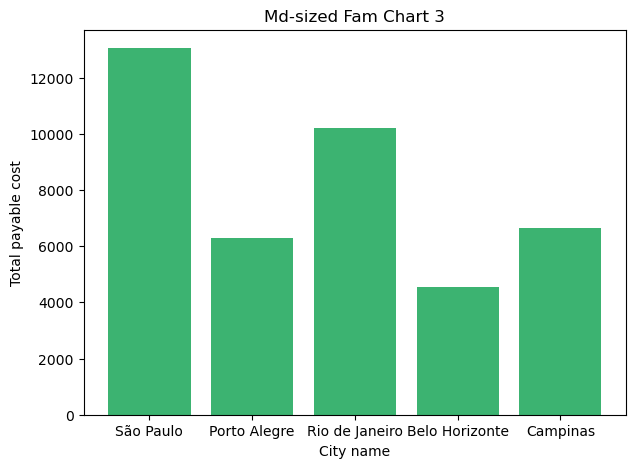

In [70]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(midsizfam_nopetfren_furn["city"], midsizfam_nopetfren_furn["total (R$)"],color="mediumseagreen")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Md-sized Fam Chart 3")
plt.savefig("Brazil_MidSizeFam3.jpg");

In [71]:
midsizfam_nopetfren_furn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Belo Horizonte    3376.750000
Porto Alegre      3904.166667
Campinas          4451.500000
Rio de Janeiro    5688.625000
São Paulo         6261.363636
Name: total (R$), dtype: float64

**Non-furnished and no animals allowed**

In [72]:
midsizfam_nopetfren_nofurn=df[(df["rooms"]==3) & (df["bathroom"]==2) & (df["parking spaces"]<=2) & (df["animal"]=="not acept") & (df["furniture"]=="not furnished")]
midsizfam_nopetfren_nofurn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
140,São Paulo,100,3,2,2,0,not acept,not furnished,0,1600,150,25,1775
153,Belo Horizonte,200,3,2,2,0,not acept,not furnished,0,4000,204,66,4270
166,São Paulo,150,3,2,2,0,not acept,not furnished,0,2500,0,38,2538
212,São Paulo,110,3,2,0,0,not acept,not furnished,0,2900,384,44,3328
253,São Paulo,90,3,2,2,6,not acept,not furnished,1710,1200,109,16,3035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10558,São Paulo,320,3,2,2,0,not acept,not furnished,0,9000,567,136,9703
10559,São Paulo,63,3,2,1,4,not acept,not furnished,532,2273,0,29,2834
10561,Rio de Janeiro,135,3,2,2,4,not acept,not furnished,935,2600,141,34,3710
10613,São Paulo,300,3,2,2,0,not acept,not furnished,0,8000,0,121,8121


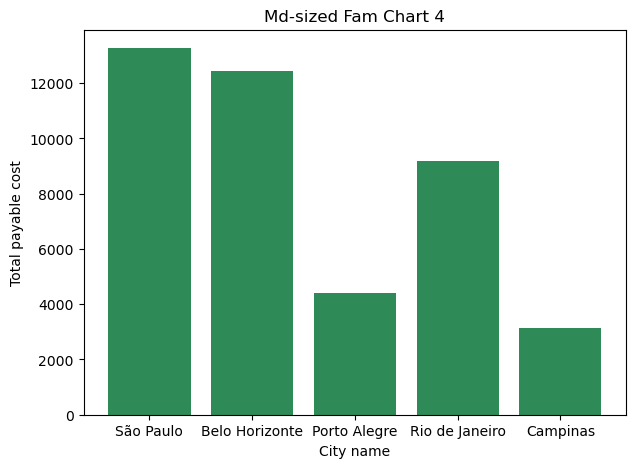

In [73]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(midsizfam_nopetfren_nofurn["city"], midsizfam_nopetfren_nofurn["total (R$)"],color="seagreen")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Md-sized Fam Chart 4")
plt.savefig("Brazil_MidSizeFam4.jpg");

In [74]:
midsizfam_nopetfren_nofurn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Campinas          2434.454545
Porto Alegre      2910.300000
Belo Horizonte    3116.066667
São Paulo         5083.489130
Rio de Janeiro    5140.250000
Name: total (R$), dtype: float64

# Suitable cities for relocation of large family 
# (5-6 members i.e parents with 1 or 2 kids with 2 sr.citizens)

**Furnished and animals allowed**

In [75]:
large_petfren_furn=df[(df["rooms"]==4) & (df["bathroom"]==2) & (df["parking spaces"]<=2) & (df["animal"]=="acept") & (df["furniture"]=="furnished")]
large_petfren_furn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,2,2,0,acept,furnished,680,8000,328,121,9129
63,São Paulo,278,4,2,2,16,acept,furnished,1174,9000,367,115,5490
106,São Paulo,300,4,2,2,0,acept,furnished,0,3896,367,53,5490
157,São Paulo,90,4,2,2,12,acept,furnished,1174,3896,367,53,5490
268,São Paulo,350,4,2,2,15,acept,furnished,2700,4590,367,59,8683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10303,São Paulo,339,4,2,2,13,acept,furnished,2800,3896,367,53,5490
10449,Rio de Janeiro,220,4,2,1,7,acept,furnished,2000,5000,362,65,7427
10554,São Paulo,320,4,2,2,0,acept,furnished,0,8000,642,121,8763
10581,São Paulo,350,4,2,2,2,acept,furnished,1174,3896,0,53,5490


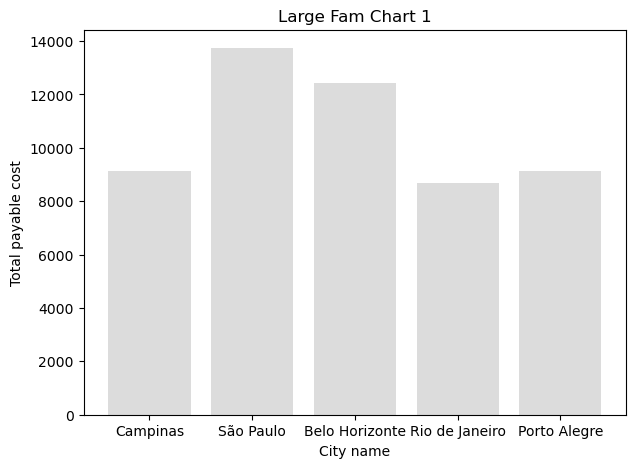

In [76]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(large_petfren_furn["city"], large_petfren_furn["total (R$)"],color="gainsboro")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Large Fam Chart 1")
plt.savefig("Brazil_LargeFam1.jpg");

In [77]:
large_petfren_furn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Rio de Janeiro    5964.083333
Porto Alegre      6692.000000
Belo Horizonte    6747.571429
Campinas          6897.000000
São Paulo         7915.284314
Name: total (R$), dtype: float64

**Non-furnished but animals allowed**

In [78]:
large_petfren_nofurn=df[(df["rooms"]==4) & (df["bathroom"]==2) & (df["parking spaces"]<=2) & (df["animal"]=="acept") & (df["furniture"]=="not furnished")]
large_petfren_nofurn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
19,São Paulo,90,4,2,2,0,acept,not furnished,0,3896,367,53,5490
40,São Paulo,300,4,2,2,5,acept,not furnished,1174,3896,367,53,5490
44,São Paulo,360,4,2,0,1,acept,not furnished,1174,6410,367,82,12490
75,São Paulo,250,4,2,2,6,acept,not furnished,2050,9800,367,125,12970
109,Rio de Janeiro,309,4,2,2,7,acept,not furnished,2661,6500,682,84,9927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,São Paulo,300,4,2,2,6,acept,not furnished,1174,5500,367,70,9679
10477,Belo Horizonte,90,4,2,0,0,acept,not furnished,0,3080,520,51,3651
10493,Campinas,132,4,2,2,5,acept,not furnished,1096,3300,164,42,4602
10611,Campinas,90,4,2,2,0,acept,not furnished,0,5500,667,83,6250


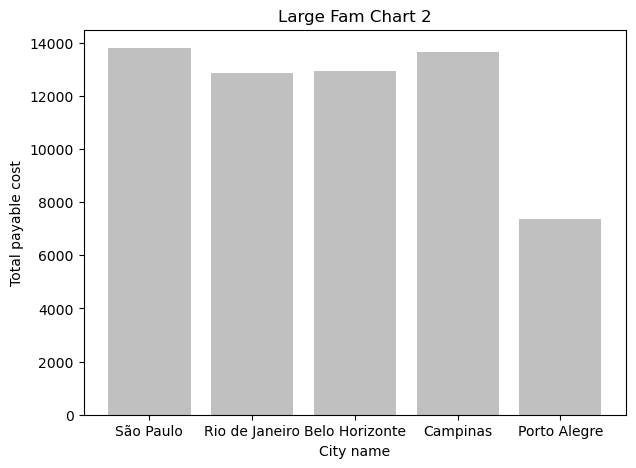

In [79]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(large_petfren_nofurn["city"], large_petfren_nofurn["total (R$)"],color="silver")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Large Fam Chart 2")
plt.savefig("Brazil_LargeFam2.jpg");

In [80]:
large_petfren_nofurn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Porto Alegre      3667.600000
Belo Horizonte    5300.235294
Campinas          6514.031250
Rio de Janeiro    6992.750000
São Paulo         7425.614407
Name: total (R$), dtype: float64

**Furnished but animals not allowed**

In [81]:
large_nopetfren_furn=df[(df["rooms"]==4) & (df["bathroom"]==2) & (df["parking spaces"]<=2) & (df["animal"]=="not acept") & (df["furniture"]=="furnished")]
large_nopetfren_furn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
180,São Paulo,90,4,2,2,3,not acept,furnished,1174,3896,344,53,5490
1262,São Paulo,90,4,2,2,0,not acept,furnished,0,3896,367,53,5490
2117,São Paulo,350,4,2,2,0,not acept,furnished,0,7500,0,113,7613
4044,São Paulo,236,4,2,2,1,not acept,furnished,1174,3896,142,53,5490
4417,São Paulo,360,4,2,2,0,not acept,furnished,0,10000,367,53,11070
5893,São Paulo,254,4,2,2,14,not acept,furnished,1174,7740,367,99,13420
6207,Rio de Janeiro,130,4,2,1,2,not acept,furnished,700,3300,145,43,4188
7159,São Paulo,90,4,2,1,0,not acept,furnished,0,3896,334,53,11330
8446,São Paulo,90,4,2,2,0,not acept,furnished,0,9000,367,136,10290
9083,São Paulo,90,4,2,2,0,not acept,furnished,0,3896,367,53,5490


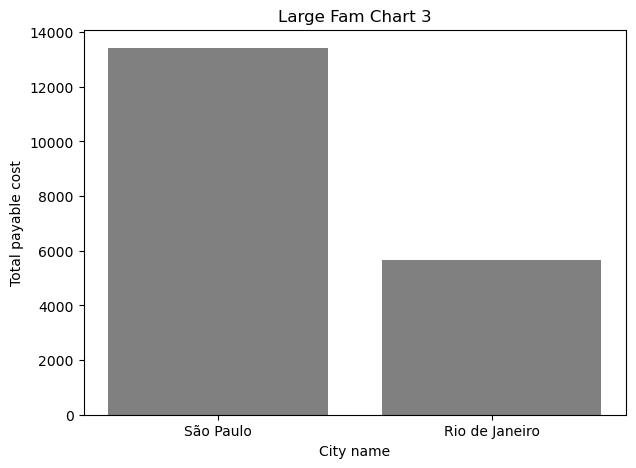

In [82]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(large_nopetfren_furn["city"], large_nopetfren_furn["total (R$)"],color="gray")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Large Fam Chart 3")
plt.savefig("Brazil_LargeFam3.jpg");

In [83]:
large_nopetfren_furn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Rio de Janeiro    4929.000000
São Paulo         7878.454545
Name: total (R$), dtype: float64

**Non-furnished and no animals allowed**

In [84]:
large_nopetfren_nofurn=df[(df["rooms"]==4) & (df["bathroom"]==2) & (df["parking spaces"]<=2) & (df["animal"]=="not acept") & (df["furniture"]=="not furnished")]
large_nopetfren_nofurn

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
42,Belo Horizonte,200,4,2,1,7,not acept,not furnished,850,2550,9,34,3443
55,São Paulo,210,4,2,2,4,not acept,not furnished,1650,9000,772,115,11540
105,Belo Horizonte,90,4,2,2,0,not acept,not furnished,0,2500,74,41,2615
276,São Paulo,240,4,2,2,6,not acept,not furnished,1869,3500,717,45,6131
307,São Paulo,280,4,2,2,6,not acept,not furnished,2500,3200,750,41,6491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,Porto Alegre,90,4,2,1,3,not acept,not furnished,400,2142,212,32,2786
9864,Campinas,270,4,2,0,0,not acept,not furnished,0,5500,357,83,5940
10143,São Paulo,300,4,2,2,7,not acept,not furnished,1660,3200,367,41,6776
10317,São Paulo,330,4,2,2,5,not acept,not furnished,1174,4500,0,58,9269


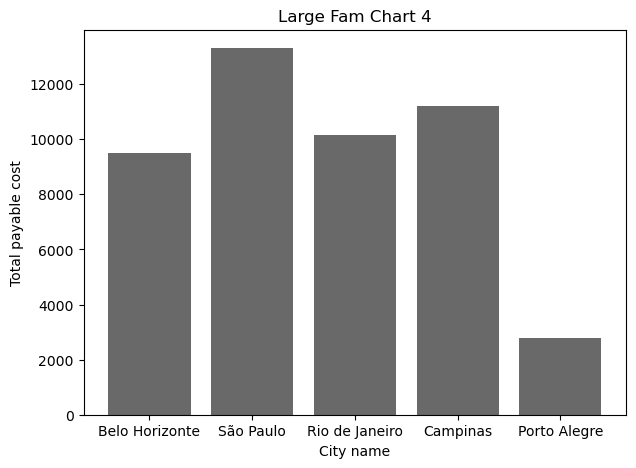

In [85]:
fig,ax=plt.subplots(figsize=(7,5))
plt.bar(large_nopetfren_nofurn["city"], large_nopetfren_nofurn["total (R$)"],color="dimgray")
plt.xlabel("City name")
plt.ylabel("Total payable cost")
plt.title("Large Fam Chart 4")
plt.savefig("Brazil_LargeFam4.jpg");

In [86]:
large_nopetfren_nofurn.groupby('city')['total (R$)'].mean().sort_values(ascending = True)

city
Porto Alegre      2334.500000
Belo Horizonte    4664.833333
Campinas          6732.333333
Rio de Janeiro    7211.250000
São Paulo         7430.658537
Name: total (R$), dtype: float64

# CONCLUSION

# ML ALgorithm

**House Tax Evaluator (Regression Pediction)**

In [87]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [88]:
df.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,5,acept,not furnished,1200,4960,367,63,7973


In [89]:
df1 = df[(df["hoa (R$)"]!=0) & (df["property tax (R$)"]!=0)].copy()  # Removing rows where property tax is 0 so as to avoid misleading model.

In [90]:
df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,5,acept,not furnished,1200,4960,367,63,7973
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,2,4,acept,not furnished,2254,3223,367,41,7253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,São Paulo,83,3,2,2,11,acept,not furnished,888,7521,221,96,8726
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,2,17,acept,not furnished,1174,3896,367,53,5490
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390


**Feature Engineering**

In [91]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [92]:
le = preprocessing.LabelEncoder()
sc = StandardScaler()

In [93]:
categorical.head(2)

,city,animal,furniture
0,São Paulo,acept,furnished
1,São Paulo,acept,not furnished


In [94]:
continuous.head(2)

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,7,2065,3300,211,42,5618
1,320,4,4,0,20,1200,4960,1750,63,7973


In [95]:
for i in categorical:                     
    df1[i] = df1[i].astype("category")
    df1[i] = le.fit_transform(df1[i])

In [96]:
continuous.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)',
       'total (R$)'],
      dtype='object')

**Scale data for only viewing correct MSE value. Keep unscaled data to make correct predictions during user input.**

for i in continuous.iloc[:,0:8]:
    df1[i] = sc.fit_transform(df1[i].to_numpy().reshape(-1,1))

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
y = df1.loc[:,"property tax (R$)"]
x = df1.loc[:,['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)']]

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7, random_state=42)

# Base Model (Linear Regression)

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [102]:
round(lin_reg.score(x_train,y_train)*100,2)

60.0

In [103]:
y_pred = lin_reg.predict(x_test)
y_pred

array([337.52615917, 153.08627543,  -4.45653814, ..., 358.85655192,
        80.43407043, 318.53236228])

In [104]:
from sklearn.metrics import mean_squared_error
mse = round(mean_squared_error(y_test,y_pred)*100,2)

In [105]:
mse 

1509265.16

**MSE value = 38.27 (when using scaled data but scaling omitted in this case to make correct prediction during new input)**

# Catboost

**Implementing Boosting to enhance underperforming model by reducing MSE value.**

In [106]:
from catboost import CatBoostRegressor

In [107]:
cat_reg = CatBoostRegressor(
    iterations=740,
    learning_rate=0.1,
    depth=9,
    loss_function='RMSE',
    verbose=100
)

In [108]:
cat_reg.fit(x_train, y_train)

0:	learn: 187.7890653	total: 176ms	remaining: 2m 9s
100:	learn: 89.5479103	total: 854ms	remaining: 5.4s
200:	learn: 74.8950878	total: 1.52s	remaining: 4.07s
300:	learn: 65.9750434	total: 2.19s	remaining: 3.19s
400:	learn: 58.5137157	total: 2.85s	remaining: 2.41s
500:	learn: 52.7036129	total: 3.52s	remaining: 1.68s
600:	learn: 47.7741748	total: 4.2s	remaining: 971ms
700:	learn: 43.4335222	total: 4.87s	remaining: 271ms
739:	learn: 42.0523616	total: 5.13s	remaining: 0us


In [109]:
round(cat_reg.score(x_train,y_train)*100,2)

95.54

In [110]:
y_pred_cat = cat_reg.predict(x_test)

In [111]:
mse_2 = round(mean_squared_error(y_test,y_pred_cat)*100,2)

In [112]:
mse_2

1390531.24

**MSE value = 35.26 (when using scaled data but scaling omitted in this case to make correct prediction during new input)**

In [113]:
x.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$)
0,4,70,2,1,1,7,0,0,2065,3300
1,4,320,4,4,0,5,0,1,1200,4960


In [114]:
y.head(2)

0    211
1    367
Name: property tax (R$), dtype: int64

In [118]:
x

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$)
0,4,70,2,1,1,7,0,0,2065,3300
1,4,320,4,4,0,5,0,1,1200,4960
3,2,51,2,1,0,2,0,1,270,1112
6,3,72,2,1,0,7,0,1,740,1900
7,4,213,4,4,2,4,0,1,2254,3223
...,...,...,...,...,...,...,...,...,...,...
10685,4,83,3,2,2,11,0,1,888,7521
10687,2,63,2,1,1,5,1,0,402,1478
10688,4,285,4,4,2,17,0,1,1174,3896
10689,3,70,3,3,0,8,1,0,980,6000


In [119]:
y

0        211
1        367
3         22
6         85
7        367
        ... 
10685    221
10687     24
10688    367
10689    332
10690    279
Name: property tax (R$), Length: 7198, dtype: int64

# House Tax Predictor 

**A machine learning model designed to estimate house tax amounts by analyzing key demographic and property attributes including city, area, number of rooms, and other relevant features.**

In [122]:
details = []


for city in range(0,50):
    city = int(input("Enter city [Belo Horizonte(0) / Campinas(1) / Porto Alegre(2) / Rio de Janeiro(3) / Sao Paulo(4): "))
    if city==0 or city==1 or city==2 or city==3 or city==4:
        details.append(city)
        break
    else:
        print("Invalid entry. Please enter from given options.")

for area in range(0,50):
    area = int(input("Enter area of property: "))
    if area<=400 and area>=10:
        details.append(area)
        break
    else:
        print("Invalid entry. Please enter correct area.")
        
for room in range(0,50):
    rooms = int(input("Enter number of rooms [1-5]: "))
    if rooms >=0 and rooms<=5:
        details.append(rooms)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for bathroom in range(0,50):
    bathroom = int(input("Enter number of bathrooms [1 - 4]: "))
    if bathroom>=1 and bathroom<=4:
        details.append(bathroom)
        break
    else:
        print("Invalid input. Please enter within given range.")
        
        
for parkings in range(0,50):
    parkings = int(input("Enter number of parkings (0,1,2,3,4): "))
    if parkings>=0 and parkings<=4:
        details.append(parkings)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for floor in range(0,50):
    floors = int(input("Which floor of your apartment [1-20]: "))
    if floors>=0 or floors<=20:
        details.append(floors)  
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for pets in range(0,50):
    pets = int(input("Do you have pets? Yes[1] or No[0] "))
    if pets==0 or pets==1:
        details.append(pets) 
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for furniture in range(0,50):
    furniture = int(input("Is the apartment Furnished[0] or Non-Furnished[1]: "))
    if furniture==0 or furniture==1:
        details.append(furniture) 
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for furniture in range(0,50):
    hoa = int(input("Enter the House Owner's Association fee: "))
    if hoa>0 and hoa<=2838:
        details.append(hoa) 
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for rent in range(0,50):
    rent = int(input("Enter apartment's rent amount: "))
    if rent>0 and rent<=10205:
        details.append(rent) 
        break
    else:
        print("Invalid entry. Please enter from given options.")


        

details_tab = [details]
print("*"*100)
print("Your estimated House tax is approximately:", cat_reg.predict(details_tab))

Enter city [Belo Horizonte(0) / Campinas(1) / Porto Alegre(2) / Rio de Janeiro(3) / Sao Paulo(4): 3
Enter area of property: 120
Enter number of rooms [1-5]: 2
Enter number of bathrooms [1 - 4]: 2
Enter number of parkings (0,1,2,3,4): 2
Which floor of your apartment [1-20]: 8
Do you have pets? Yes[1] or No[0] 0
Is the apartment Furnished[0] or Non-Furnished[1]: 0
Enter the House Owner's Association fee: 1585
Enter apartment's rent amount: 3896
****************************************************************************************************
Your estimated House tax is approximately: [324.05583408]
